In [1]:

import numpy as np

import scoobpsf
from scoobpsf.math_module import xp, _scipy, ensure_np_array
from scoobpsf.imshows import *
import scoobpsf.compact_scoob as cscoob
import scoobpsf.dm as dm
import scoobpsf.scoobi as scoobi

import time 
from importlib import reload

import lina


Jax available; Jax model can be used.
Succesfully initialized testbed interface.


In [63]:
reload(scoobi)
tbi = scoobi.SCOOBI(cam_channel='nsvcam', dm_channel='dm00disp05')
# tbi.zero_dm()

Succesfully initialized testbed interface.


In [68]:
scoobi.move_psf(20, 0)

In [69]:
tbi.exp_time = 0.1*u.millisecond

In [70]:
tbi.attenuation = 28

In [71]:
tbi.normalize = True
# tbi.normalize = False

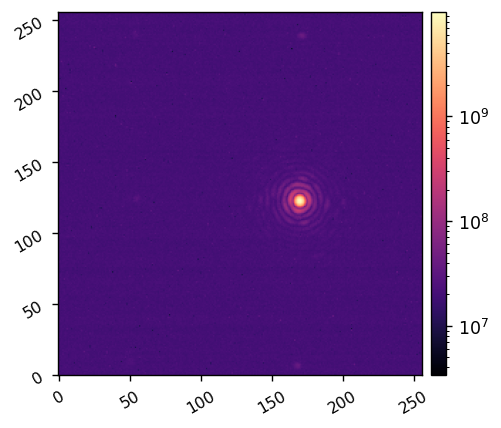

In [72]:
raw_im = tbi.snap()
imshow1(raw_im, lognorm=True)

In [99]:
tbi.Imax_ref = xp.max(raw_im)

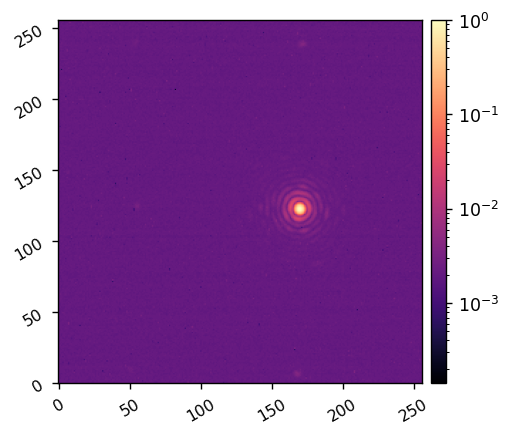

In [74]:
ref_psf = tbi.snap()
imshow1(ref_psf, lognorm=True)

In [93]:
scoobi.move_psf(0,1)

In [79]:
tbi.exp_time = 5*u.millisecond
tbi.attenuation = 15

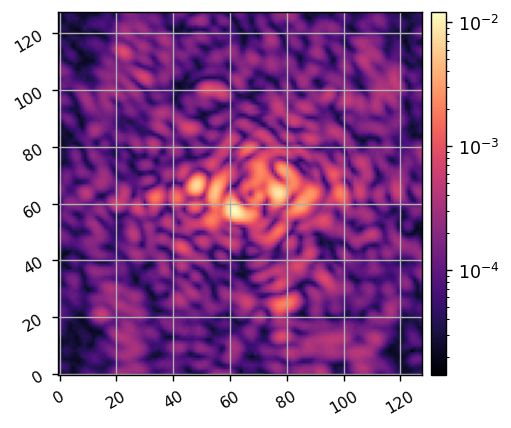

In [101]:
tbi.x_shift = 5
tbi.y_shift = 5
ref_im = tbi.snap()
tbi.npsf = 128
imshow1(ref_im, lognorm=True, grid=True)

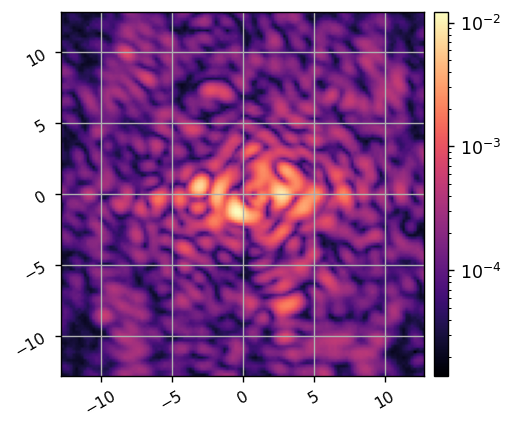

In [102]:
imshow1(ref_im, pxscl=tbi.psf_pixelscale_lamD, lognorm=True, grid=True)

In [103]:
tbi.psf_pixelscale_lamD

0.2

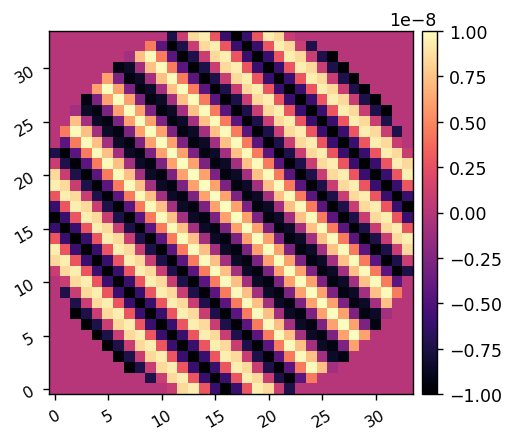

In [8]:
Nact = 34
xpp = np.arange(-Nact//2, Nact//2) + 1/2
ppx, ppy = np.meshgrid(xpp,xpp)
amp = 1e-8
separation = 5
comm1 = amp*np.cos(2*np.pi*(ppx + ppy)*separation/Nact)*tbi.dm_mask
# comm2 = amp*np.cos(2*np.pi*(ppx - ppy)*separation/Nact)*model.dm_mask

imshow1(comm1)
# model.set_dm1(ensure_np_array(comm1))

In [110]:
xp.array

<function cupy._creation.from_data.array(obj, dtype=None, copy=True, order='K', subok=False, ndmin=0)>

In [108]:
from astropy.io import fits
response_matrix = xp.array(fits.getdata('jacobian.fits'))

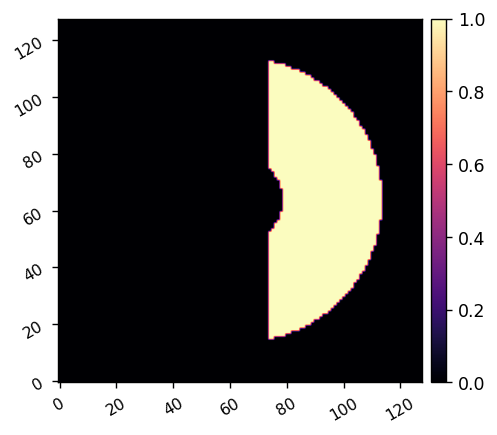

In [105]:
control_mask = lina.utils.create_annular_focal_plane_mask(tbi, 3, 10, 2, plot=True)

In [115]:
tbi.Nframes = 100

In [112]:
tbi.dm_delay = 0.1

INFO:utils:Got semaphore index 0.


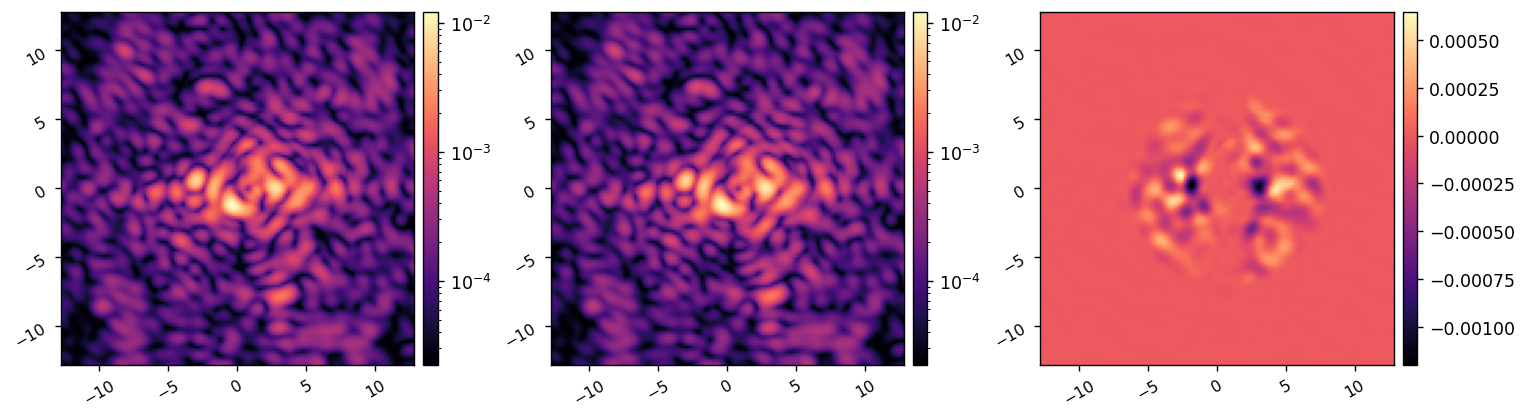

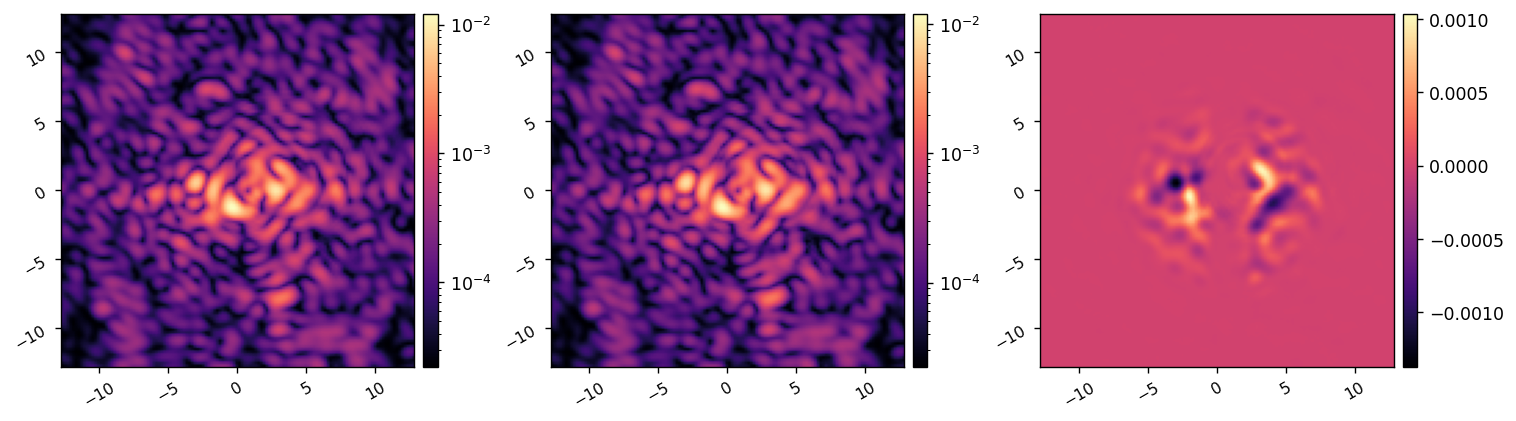

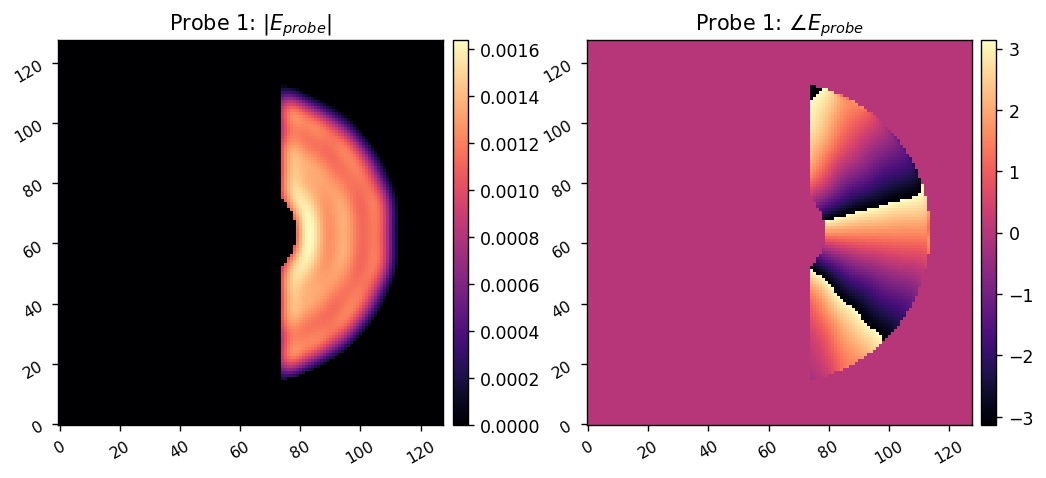

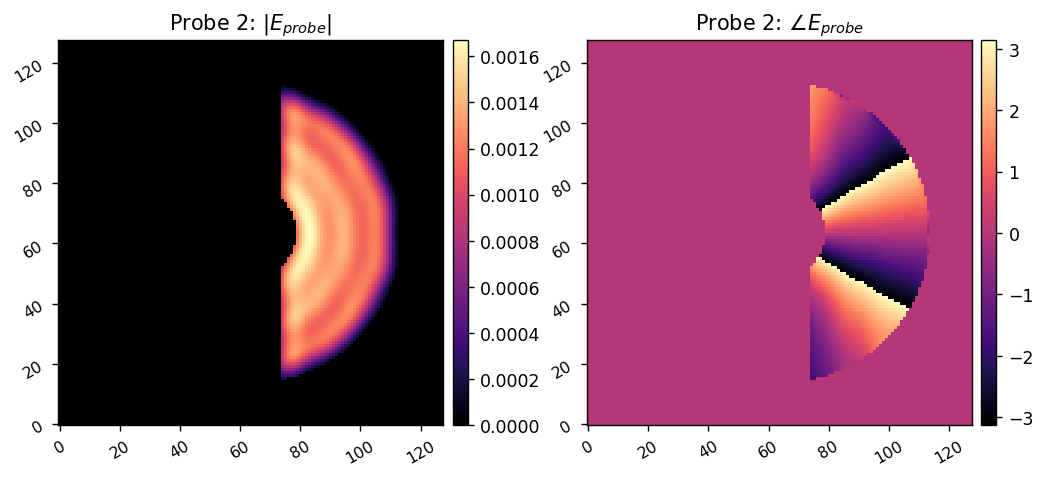

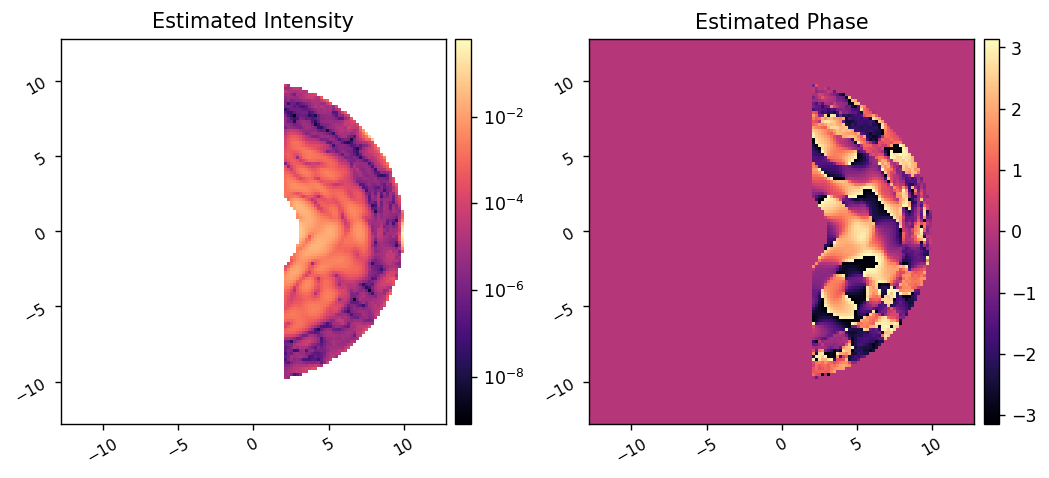

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

In [116]:
probe_amp = 5e-9
probe_modes = lina.utils.create_fourier_probes(tbi, control_mask, fourier_sampling=0.25, nprobes=2)
probes = probe_amp*probe_modes

lina.pwp.run_pwp_bp(tbi, control_mask, probes, use='J', jacobian=response_matrix, plot=True)